# ciao

# Introduction

## Train Multiple Models

Now that we have done feature engineering on the dataset, the next step is to train the data on different regression models.
The models we will be using are the following:
- **Linear Regression**
- **Decision Tree**
- **Adaboost Regressor**
- **Random Forest**

For each model, there will be a training and parameter tuning phase, and a predictions phase.
Results of the predictions are then plotted and visualized.

# Setup
Let us import the required modules.

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import joblib

# import project.src.feat_eng as fe
# import project.src.visualization as viz
import src.evaluation as eva

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Load Data
Note that the dataset is already split into Train-Test sets.

In [56]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [77]:
y = y.astype(int)
X = X.astype(np.float32)
X = X/255.

In [78]:
X.shape

(70000, 784)

In [79]:
y.shape

(70000,)

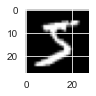

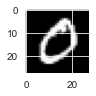

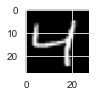

In [80]:
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(X.loc[i].array.reshape((28, 28)), cmap=plt.get_cmap('gray'))
    plt.show()

# Pixels with 1 Unique value (useless pixels)

In [100]:
one_val_vars = [var for var in X.columns if X[var].dtypes != 'O' and len(X[var].unique()) == 1]
print("The total number of useless feature is: ", len(one_val_vars))

The total number of useless feature is:  65


In [101]:
for f in one_val_vars:
    print (f, X.loc[:,f].unique())

pixel1 [0.]
pixel2 [0.]
pixel3 [0.]
pixel4 [0.]
pixel5 [0.]
pixel6 [0.]
pixel7 [0.]
pixel8 [0.]
pixel9 [0.]
pixel10 [0.]
pixel11 [0.]
pixel12 [0.]
pixel17 [0.]
pixel18 [0.]
pixel19 [0.]
pixel20 [0.]
pixel21 [0.]
pixel22 [0.]
pixel23 [0.]
pixel24 [0.]
pixel25 [0.]
pixel26 [0.]
pixel27 [0.]
pixel28 [0.]
pixel29 [0.]
pixel30 [0.]
pixel31 [0.]
pixel32 [0.]
pixel53 [0.]
pixel54 [0.]
pixel55 [0.]
pixel56 [0.]
pixel57 [0.]
pixel58 [0.]
pixel83 [0.]
pixel84 [0.]
pixel85 [0.]
pixel86 [0.]
pixel112 [0.]
pixel113 [0.]
pixel141 [0.]
pixel169 [0.]
pixel477 [0.]
pixel561 [0.]
pixel645 [0.]
pixel672 [0.]
pixel673 [0.]
pixel674 [0.]
pixel700 [0.]
pixel701 [0.]
pixel702 [0.]
pixel728 [0.]
pixel729 [0.]
pixel730 [0.]
pixel731 [0.]
pixel755 [0.]
pixel756 [0.]
pixel757 [0.]
pixel758 [0.]
pixel759 [0.]
pixel760 [0.]
pixel781 [0.]
pixel782 [0.]
pixel783 [0.]
pixel784 [0.]


# REMOVE THESE PIXELS

In [102]:
X_1 = X.drop(one_val_vars, axis=1)

In [105]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 784 columns):
 #    Column    Dtype  
---   ------    -----  
 0    pixel1    float32
 1    pixel2    float32
 2    pixel3    float32
 3    pixel4    float32
 4    pixel5    float32
 5    pixel6    float32
 6    pixel7    float32
 7    pixel8    float32
 8    pixel9    float32
 9    pixel10   float32
 10   pixel11   float32
 11   pixel12   float32
 12   pixel13   float32
 13   pixel14   float32
 14   pixel15   float32
 15   pixel16   float32
 16   pixel17   float32
 17   pixel18   float32
 18   pixel19   float32
 19   pixel20   float32
 20   pixel21   float32
 21   pixel22   float32
 22   pixel23   float32
 23   pixel24   float32
 24   pixel25   float32
 25   pixel26   float32
 26   pixel27   float32
 27   pixel28   float32
 28   pixel29   float32
 29   pixel30   float32
 30   pixel31   float32
 31   pixel32   float32
 32   pixel33   float32
 33   pixel34   float32
 34   pixel35   float32
 3

In [104]:
X_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 719 columns):
 #    Column    Dtype  
---   ------    -----  
 0    pixel13   float32
 1    pixel14   float32
 2    pixel15   float32
 3    pixel16   float32
 4    pixel33   float32
 5    pixel34   float32
 6    pixel35   float32
 7    pixel36   float32
 8    pixel37   float32
 9    pixel38   float32
 10   pixel39   float32
 11   pixel40   float32
 12   pixel41   float32
 13   pixel42   float32
 14   pixel43   float32
 15   pixel44   float32
 16   pixel45   float32
 17   pixel46   float32
 18   pixel47   float32
 19   pixel48   float32
 20   pixel49   float32
 21   pixel50   float32
 22   pixel51   float32
 23   pixel52   float32
 24   pixel59   float32
 25   pixel60   float32
 26   pixel61   float32
 27   pixel62   float32
 28   pixel63   float32
 29   pixel64   float32
 30   pixel65   float32
 31   pixel66   float32
 32   pixel67   float32
 33   pixel68   float32
 34   pixel69   float32
 3

All the numbers that we have are specified as integers.
For our problem we want network to learn visual representation of the numbers.
We cannot use them as integers, because it will create problems during the training.
Basically, with the integer definition we’re implying that number 1 visually more similar to 0 than to number 7.
It happens only because difference between 1 and 0 smaller than difference between 1 and 7.
In order to avoid making any type of assumptions we will use one-hot encoding technique. (no, just keep the y as it is pls)

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_1, y, test_size=0.20)

Notice that data was converted into 32 bit float numbers.
This is the only float type that currently supported by NeuPy.

In [114]:
x_train.head(5)

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
40412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
y_train.head(5)

40412    0
37817    5
64193    6
6738     0
24285    9
Name: class, dtype: int64

# Modelli

# Random Forest Regression Model

In [119]:
# automatic parameters tuning
# rfreg=RandomForestRegressor(random_state=30)
# properties={
#     "n_estimators": [x for x in range(50,101,50)],
#     # "min_samples_leaf": [x for x in range(180,251,7)],
#     # "max_leaf_nodes": [x for x in range(14,71,14)],
#     # "max_features": ["sqrt"]
# }
#
# tuned_rfreg=GridSearchCV(rfreg,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=4,n_jobs=-1)
# tuned_rfreg.fit(x_train,y_train)
#
# print ("Best Score: {:.3f}".format(tuned_rfreg.best_score_) )
# print ("Best Params: ", tuned_rfreg.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Score: -0.931
Best Params:  {'max_features': 'sqrt', 'n_estimators': 100}


In [122]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_rfreg, '../../tuned_models/randforest_tuning_results.pkl')

In [12]:
# to load previously saved results
# tuned_rfreg = joblib.load("../../tuned_models/randforest_tuning_results.pkl")

In [120]:
# print(tuned_rfreg.cv_results_)
# tuned_rfreg_results = pd.DataFrame( tuned_rfreg.cv_results_ )

In [121]:
# tuned_rfreg_results[["param_n_estimators","mean_test_score","mean_train_score"]]

In [123]:
# sns.set(rc={"figure.figsize":(12, 8)})
# sns.lineplot(data=tuned_rfreg_results, x="param_n_estimators", y="mean_test_score")

In [124]:
# sns.set(rc={"figure.figsize":(12, 8)})
# sns.lineplot(data=tuned_rfreg_results, x="param_min_samples_leaf", y="mean_test_score")

In [125]:
# sns.set(rc={"figure.figsize":(12, 8)})
# sns.lineplot(data=tuned_rfreg_results, x=tuned_rfreg_results.index, y="mean_test_score")

In [126]:
# print(tuned_rfreg.best_estimator_)
# print(tuned_rfreg.best_score_)

In [127]:
# test_acc = mean_squared_error(y_true = y_train,
#                           y_pred = tuned_rfreg.predict(x_train) )
# print ("Train Accuracy: {}".format(test_acc) )

In [128]:
# best parameters from automatic parameters tuning
# forest_reg = RandomForestRegressor(**tuned_rfreg.best_params_)
forest_reg = RandomForestRegressor(n_estimators=50)
forest_reg.fit(x_train, y_train)

[CV 3/5] END max_features=sqrt, n_estimators=50;, score=(train=-0.144, test=-0.967) total time=  25.4s
[CV 2/5] END max_features=sqrt, n_estimators=100;, score=(train=-0.134, test=-0.885) total time=  50.5s
[CV 2/5] END max_features=sqrt, n_estimators=50;, score=(train=-0.145, test=-0.910) total time=  25.4s
[CV 3/5] END max_features=sqrt, n_estimators=100;, score=(train=-0.134, test=-0.940) total time=  51.0s
[CV 4/5] END max_features=sqrt, n_estimators=50;, score=(train=-0.144, test=-0.941) total time=  25.0s
[CV 5/5] END max_features=sqrt, n_estimators=50;, score=(train=-0.142, test=-0.980) total time=  25.2s
[CV 4/5] END max_features=sqrt, n_estimators=100;, score=(train=-0.134, test=-0.924) total time=  42.5s
[CV 1/5] END max_features=sqrt, n_estimators=50;, score=(train=-0.144, test=-0.972) total time=  25.2s
[CV 1/5] END max_features=sqrt, n_estimators=100;, score=(train=-0.133, test=-0.947) total time=  50.5s
[CV 5/5] END max_features=sqrt, n_estimators=100;, score=(train=-0.13

RandomForestRegressor(n_estimators=50)

In [129]:
rfreg_train_pred = forest_reg.predict(x_train)
rfreg_test_pred = forest_reg.predict(x_test)

rfreg_train_eval = eva.Evaluation(y_real=y_train, y_pred=rfreg_train_pred)
rfreg_test_eval = eva.Evaluation(y_real=y_test, y_pred=rfreg_test_pred)

In [130]:
print("Training:")
rfreg_train_eval.print_eval()
print("Testing:")
rfreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.17263321428571424
Mean Squared Error : 0.11986282142857144
Root Mean Squared Error : 0.34621210468233404

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.44466714285714287
Mean Squared Error : 0.7675768857142857
Root Mean Squared Error : 0.8761146532927558



In [52]:
# rfr_model = eva.EvaluatedModel(forest_reg, train_eval=rfreg_train_eval, test_eval=rfreg_test_eval)